In [1]:
%matplotlib inline

import numpy as np
import skimage.transform
import torch
import torch.nn as nn
import torch.nn. functional as F

from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import models, transforms
from torchvision.utils import save_image

from rise import RISE
from utils.visualize import visualize, reverse_normalize
from utils.imagenet_labels import label2idx, idx2label

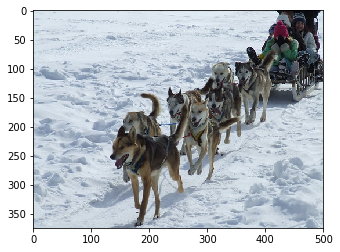

In [2]:
# from ImageNet
# choose a picture

# image = Image.open('./sample/tigercat.jpg')
# idx = label2idx['tiger cat']

image = Image.open('./sample/dogsled.jpg')
idx = label2idx['dogsled, dog sled, dog sleigh']

imshow(image)

In [3]:
# preprocessing. mean and std from ImageNet
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)

preprocess = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

In [4]:
# convert image to tensor
tensor = preprocess(image)

# reshape 4D tensor (N, C, H, W)
tensor = tensor.unsqueeze(0)
_, _, H, W = tensor.shape

# send tensor to gpu if gpu is available
device = 'cuda' if torch.cuda.is_available else 'cpu'
tensor = tensor.to(device)

In [5]:
model = models.resnet18(pretrained=True)
model.eval()

# send model to gpu if gpu is available
model = model.to(device)

In [6]:
wrapped_model = RISE(model, input_size=(H, W))

In [7]:
with torch.no_grad():
    saliency = wrapped_model(tensor)

In [8]:
saliency = saliency[idx]

In [9]:
# reverse normalization for display
img = reverse_normalize(tensor.to('cpu'))

In [10]:
saliency = saliency.view(1, 1, H, W)
heatmap = visualize(img, saliency)

In [11]:
# save image
save_image(heatmap, './sample/{}_rise.png'.format(idx2label[idx]).replace(" ", "_").replace(",", ""))

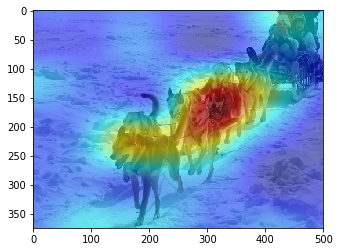

In [12]:
# or visualize on Jupyter
hm = (heatmap.squeeze().numpy().transpose(1, 2, 0)).astype(np.int32)
imshow(hm)